<a href="https://colab.research.google.com/github/DeVcB13d/OpenCV_Tut/blob/main/Geometric_Operations_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png

--2022-06-26 01:35:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K   346KB/s    in 1.3s    

2022-06-26 01:35:25 (346 KB/s) - ‘lenna.png’ saved [473831/473831]

--2022-06-26 01:35:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-course

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [ ]:
def plot_img(image_1,image_2):
  plt.subplot(1,2,1)
  plt.imshow(image_1,cmap="gray")
  plt.subplot(1,2,2)
  plt.imshow(image_2,cmap="gray")
  plt.show()

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

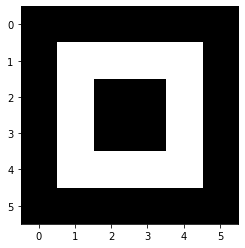

In [ ]:
toy_img = np.zeros((6,6))
toy_img[1:5,1:5] = 255
toy_img[2:4,2:4] = 0
plt.imshow(toy_img,cmap="gray")
toy_img


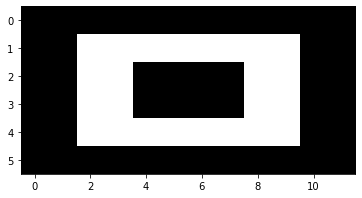

In [ ]:
new_toy = cv.resize(toy_img,None,fx=2,fy=1,interpolation=cv.INTER_NEAREST)
plt.imshow(new_toy,cmap='gray')
plt.show()

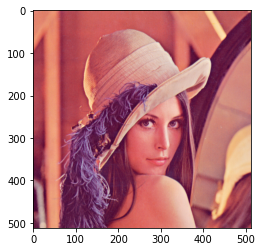

In [6]:
image = cv.imread("lenna.png")
image2 = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

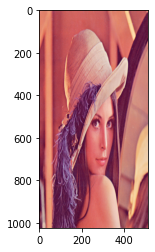

(1024, 512, 3)
(512, 512, 3)


In [13]:
new_image = cv.resize(image2,None,fx=1,fy=2,interpolation=cv.INTER_CUBIC)
plt.imshow(new_image)
plt.show()
print(new_image.shape)
print(image2.shape)


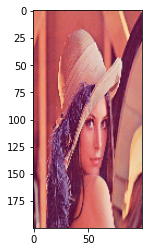

(200, 100, 3)
(512, 512, 3)


In [14]:
new_image = cv.resize(image2,(100,200),interpolation=cv.INTER_CUBIC)
plt.imshow(new_image)
plt.show()
print(new_image.shape)
print(image2.shape)

In [34]:
tx = 100
ty = 20
M = np.float32([[1,0,tx],[0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,  20.]], dtype=float32)

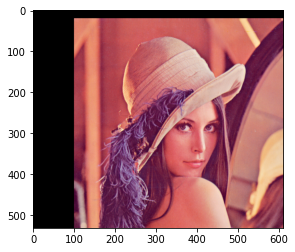

In [36]:
col,rows,c = image2.shape
new_image = cv.warpAffine(image2,M,(col+100,rows+20))
plt.imshow(new_image)
plt.show()

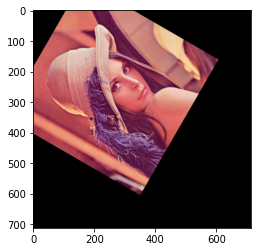

In [43]:
cols,rows,_ = image2.shape
M = cv.getRotationMatrix2D(center=(cols//2-1,rows//2-1),angle=60.0,scale=1)
new_image = cv.warpAffine(image2,M,(cols+200,rows+200))
plt.imshow(new_image)
plt.show()

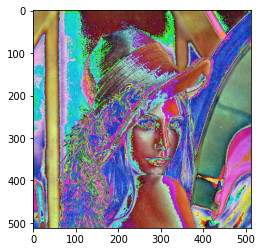

In [52]:
new_image = 3*image2 
plt.imshow(new_image)
plt.show()


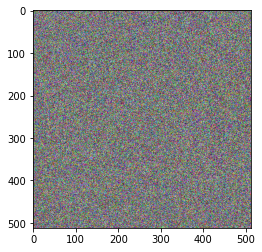

In [56]:
Noise = np.random.normal(0,20,(rows,cols,3)).astype(np.uint8)
Noise.shape

new_image = image2 * Noise

plt.imshow(new_image)
plt.show()

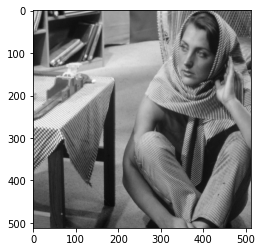

In [57]:
im_gray = cv.imread('barbara.png', cv.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

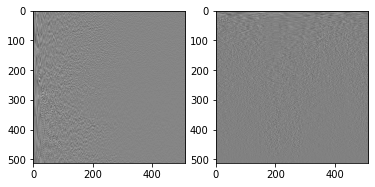

In [60]:
U,s,V = np.linalg.svd(im_gray,full_matrices=True)
s.shape
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
plot_img(U,V)

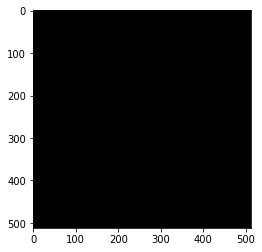

In [63]:
plt.imshow(S,cmap="gray")
plt.show()

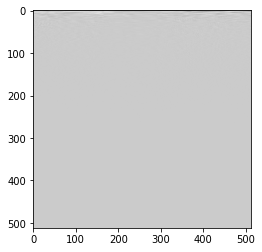

In [64]:
B = S.dot(V)
plt.imshow(B,cmap="gray")
plt.show()

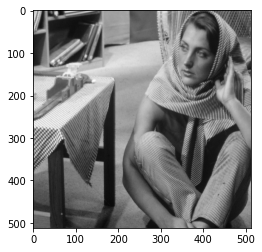

In [66]:
A = U.dot(B)
plt.imshow(A,cmap="gray")

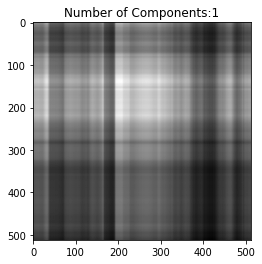

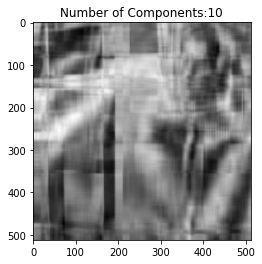

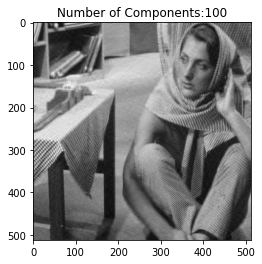

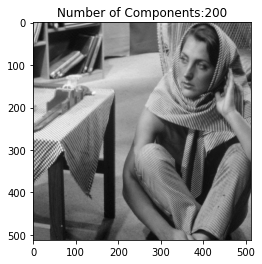

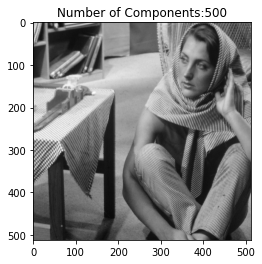

In [67]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()